In [156]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio

Próxima aula:
* Operação pontual; **FEITO**
* Combinação de Imagens **FEITO**
* Soma **FEITO**
* Multiplicação **FEITO**
* Subtração **FEITO**
* Histogramas; **FEITO**
* Log e exp; **FEITO**
* Compressão expansão;
* Equalização;
* Otsu.

## Functions

In [157]:
def normalize(img : np.ndarray, min = 0.0, max = 1.0):
  """Function that converts an image to the given desired range.

  Parameters
  ----------

  img : np.ndarray
    Image to be normalized.
  min : float
    Bottom value of the new range for conversion.
  max : float
    Top value of the new range for conversion."""
  return ((img - np.min(img))/(np.max(img) - np.min(img)))*(max - min) + min

def to_image(img : np.ndarray):
  """Converts an image to the 8-bit unsigned integer range

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""
  
  return normalize(img, 0.0, 255.0).astype(np.uint8)

def convert_to_grayscale(img : np.ndarray):
  """Function that converts an image to grayscale with standard color weights.

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""

  return to_image(0.299*img[:, :, 0] + 0.587*img[:, :, 1] + 0.114*img[:, :, 2])

In [158]:
def avg(img1 : np.ndarray, img2 : np.ndarray):
    assert img1.shape == img2.shape, "The two images should have the same size and color channels."
    return (img1 + img2)/2.0

def gaussian(shape : tuple, sigma : float, x0 : np.ndarray = np.array([0.0, 0.0])):
    x = np.arange(-shape[1], shape[1], 2.0)
    y = np.arange(-shape[0], shape[0], 2.0)
    x, y = np.meshgrid(x, y)
    return np.exp(-((x - x0[0])**2 + (y - x0[1])**2)/(2*sigma**2))

def log(img : np.ndarray):
    n_img = np.zeros_like(img)
    n_img[img > 0] = np.log(img[img > 0])
    return to_image(n_img)

def exp(img : np.ndarray):
    return to_image(np.exp(img))

def otsu(img : np.ndarray):
    pass

def compress(img : np.ndarray):
    pass

def histogram(img : np.ndarray):
    """Produces a histogram of the image. 
    Returns a tuple with the unique values and its counts.
    
    Parameters
    ----------
     
    img : np.ndarray (N, M)
        Grayscale image to be processed."""
    
    n_img = to_image(img)

    val, counts = np.unique(n_img, return_counts=True)

    rang = np.arange(0, 256, 1).astype(np.int64)
    hist = np.zeros_like(rang).astype(np.int64)
    hist[val] += counts
    
    return rang, hist


def equalization(img : np.ndarray):
    val, count = histogram(img)
    P = img.shape[0]*img.shape[1]
    
    ps = count/P

    cdf = lambda p, i : np.sum(p[:i])  



In [159]:
img = iio.imread("imagens/granny.png")
img2 = iio.imread("imagens/granny2.jpeg")

(1600, 1200)
(1600, 1200)


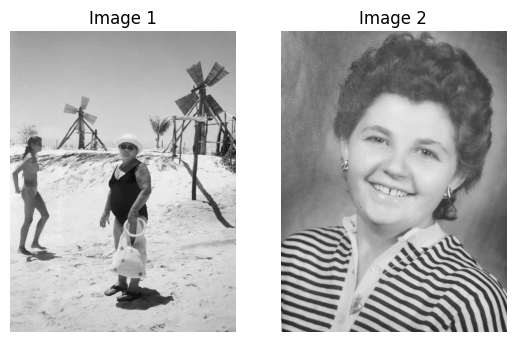

In [160]:
img = convert_to_grayscale(img)
img2 = convert_to_grayscale(img2)

plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.title("Image 1")
plt.axis("off")

plt.subplot(122)
plt.imshow(img2, cmap = "gray")
plt.title("Image 2")
plt.axis("off")

print(img.shape)
print(img2.shape)

## Basic Operations


(-0.5, 1199.5, 1599.5, -0.5)

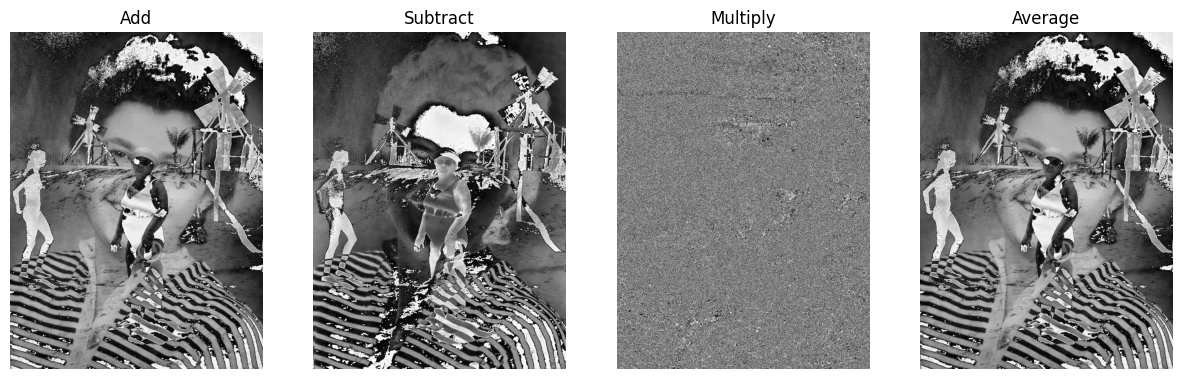

In [161]:
plt.figure(figsize=(15, 15))

plt.subplot(141)
plt.imshow(to_image(img + img2), cmap = "gray")
plt.title("Add")
plt.axis("off")

plt.subplot(142)
plt.imshow(to_image(img - img2), cmap = "gray")
plt.title("Subtract")
plt.axis("off")

plt.subplot(143)
plt.imshow(to_image(img*img2), cmap = "gray")
plt.title("Multiply")
plt.axis("off")

plt.subplot(144)
plt.imshow(to_image(avg(img, img2)), cmap = "gray")
plt.title("Average")
plt.axis("off")

(-0.5, 1199.5, 1599.5, -0.5)

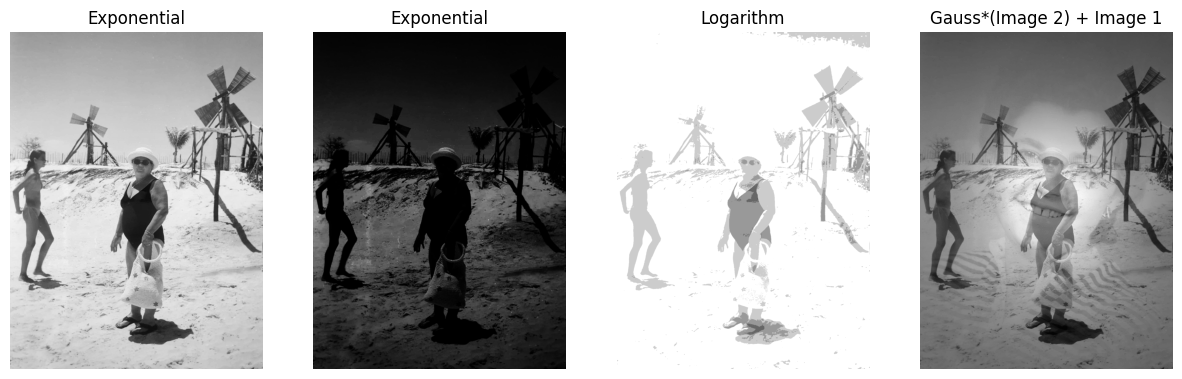

In [162]:
plt.figure(figsize=(15, 15))

plt.subplot(141)
plt.imshow(img, cmap = "gray")
plt.title("Exponential")
plt.axis("off")

plt.subplot(142)
plt.imshow(exp(normalize(img, 0.0, 10.0)), cmap = "gray")
plt.title("Exponential")
plt.axis("off")

plt.subplot(143)
plt.imshow(log(img), cmap = "gray")
plt.title("Logarithm")
plt.axis("off")
plt.subplot(144)
plt.imshow(gaussian(img.shape, 600.0)*img2 + img, cmap = "gray")
plt.title("Gauss*(Image 2) + Image 1")
plt.axis("off")


## Histogram

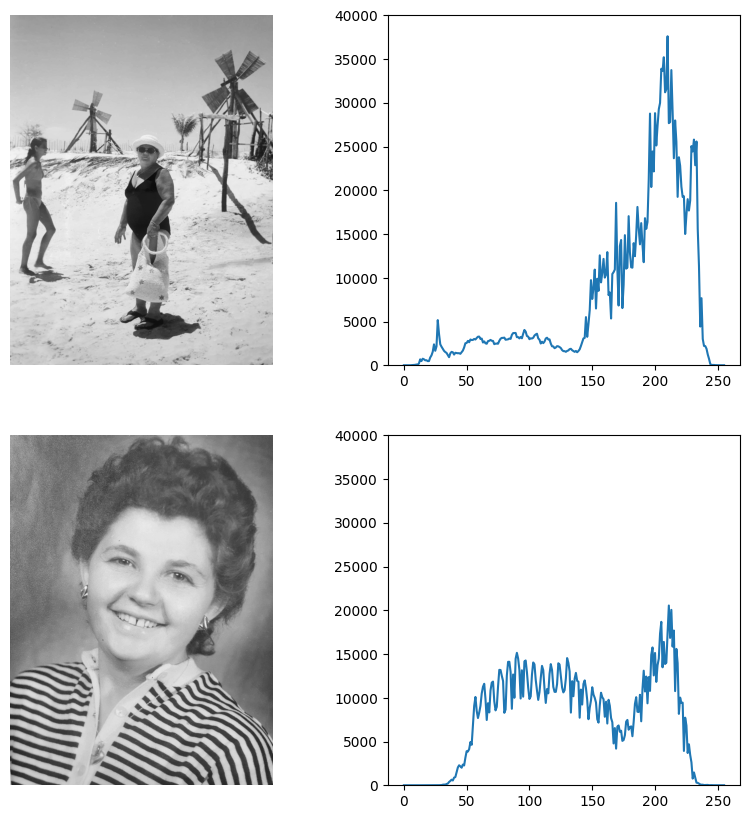

In [171]:
val1, counts1 = histogram(img)
val2, counts2 = histogram(img2)

plt.figure(figsize = (10, 10))

plt.subplot(221)
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.subplot(222)
plt.ylim(0.0, 40000)
plt.plot(val1, counts1)
plt.subplot(223)
plt.imshow(img2, cmap = "gray")
plt.axis("off")
plt.subplot(224)
plt.ylim(0.0, 40000)
plt.plot(val2, counts2)

